In [2]:
## Make a simple boxcar filter
import numpy as np

def boxcar(y, box_pts=2):
    box = np.ones(box_pts)/box_pts
    y_boxcar = np.convolve(y, box, mode='same')
    return y_boxcar

In [3]:
#group_dates = open('group_dates.txt', 'r').readlines()
group_dates = [x.strip() for x in open('texts/ndvi_dates.txt', 'r').readlines()]
ndvi_vals = [x.strip() for x in open('texts/ndvi_vals.txt', 'r').readlines()]

precip_dates = [x.strip() for x in open('texts/pres_precip_dates.txt', 'r').readlines()]
precip_vals = [x.strip() for x in open('texts/pres_precip_vals.txt', 'r').readlines()]

gdd_dates = [x.strip() for x in open('texts/pres_gdd_dates.txt', 'r').readlines()]
gdd_vals = [x.strip() for x in open('texts/pres_gdd_vals.txt', 'r').readlines()]

soil_dates = [x.strip() for x in open('texts/pres_soil_dates.txt', 'r').readlines()]
soil_vals = [x.strip() for x in open('texts/pres_soil_vals.txt', 'r').readlines()]


# format='%Y-%m-%d'

In [4]:
import matplotlib.pyplot as plt
from datetime import datetime, date

In [5]:
type(group_dates[1])
group_dates_dt = []
precip_dates_dt = []
gdd_dates_dt = []
soil_dates_dt = []

for d in group_dates:
    group_dates_dt.append(datetime.strptime(d,  '%Y-%m-%d %H:%M:%S'))
for d in precip_dates:
    precip_dates_dt.append(datetime.strptime(d,  '%Y-%m-%d %H:%M:%S'))
for d in gdd_dates:
    gdd_dates_dt.append(datetime.strptime(d,  '%Y-%m-%d %H:%M:%S'))
for d in soil_dates:
    soil_dates_dt.append(datetime.strptime(d,  '%Y-%m-%d %H:%M:%S'))


In [6]:
import pandas as pd

for i in range(0, len(soil_vals)):
    soil_vals[i] = pd.to_numeric(soil_vals[i], errors='coerce')
    
for i in range(0, len(ndvi_vals)):
    ndvi_vals[i] = pd.to_numeric(ndvi_vals[i], errors='coerce')
    
for i in range(0, len(gdd_vals)):
    precip_vals[i] = pd.to_numeric(precip_vals[i], errors='coerce')
    
for i in range(0, len(gdd_vals)):
    gdd_vals[i] = pd.to_numeric(gdd_vals[i], errors='coerce')

(736695.0, 737060.0)

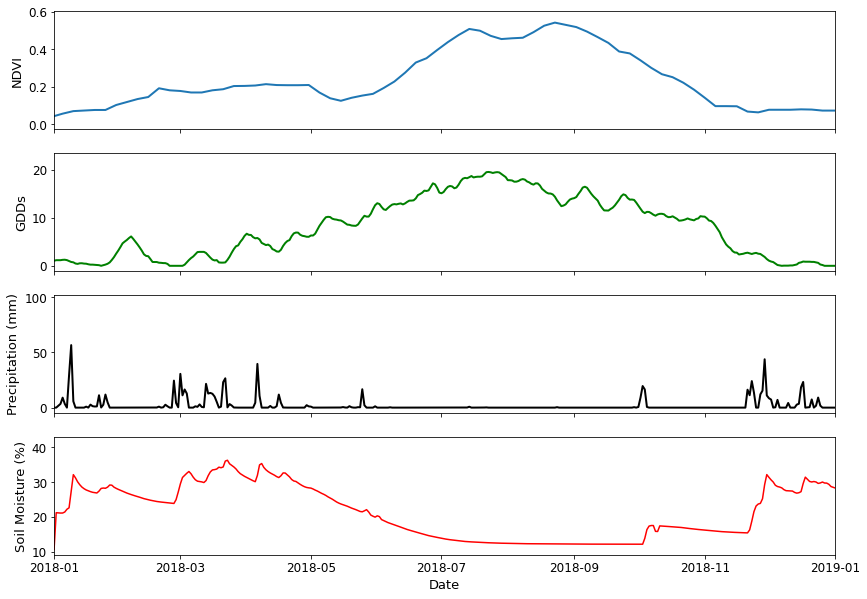

In [7]:
import datetime

ylabs = ['NDVI', 'GDDs', 'Precipitation (mm)', 'Soil Moisture (%)']

fig, axs = plt.subplots(4, 1, figsize=(14, 10), sharex=True)


axs[0].plot(group_dates_dt, ndvi_vals, linewidth=2.0)
axs[1].plot(gdd_dates_dt, boxcar(gdd_vals, 10), color = 'green', linewidth=2.0)
axs[2].plot(precip_dates_dt, precip_vals, color = 'black', linewidth=2.0)
axs[3].plot(soil_dates_dt, boxcar(soil_vals), color='red')

for (ax, lab) in zip(axs, ylabs):
    ax.set_ylabel(lab, size=13)
    ax.tick_params('both', labelsize=12)

axs[-1].set_xlabel('Date', size=13)

year = 2018
plt.xlim(datetime.date(year, 1, 1), datetime.date(year+1, 1, 1))

In [90]:
ndvi_df = pd.DataFrame(ndvi_vals, columns = ['ndvi'])
ndvi_df['date'] = pd.to_datetime(group_dates_dt)
ndvi_df = ndvi_df[ndvi_df.date.dt.year >= 2018]
ndvi_df = ndvi_df[ndvi_df.date.dt.year <= 2019]

soil_df = pd.DataFrame(soil_vals, columns = ['soil'])
soil_df['date'] = pd.to_datetime(soil_dates_dt)
soil_df = soil_df[soil_df.date.dt.year >= 2018]
soil_df = soil_df[soil_df.date.dt.year <= 2019]


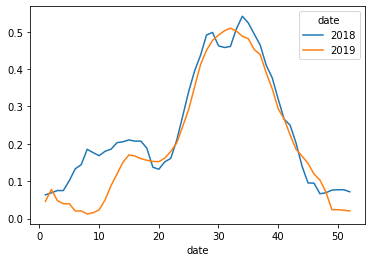

In [96]:
ndvi_pv = pd.pivot_table(ndvi_df, index=ndvi_df.date.dt.week, columns=ndvi_df.date.dt.year,
                    values='ndvi', aggfunc='mean')
soil_pv = pd.pivot_table(soil_df, index=gdd_df.date.dt.week, columns=gdd_df.date.dt.year,
                    values='soil', aggfunc='mean')
ylabs = ['NDVI', 'Soil Moisture (%)']


ndvi_pv.plot()

Text(0.5, 0, 'Week of Year')

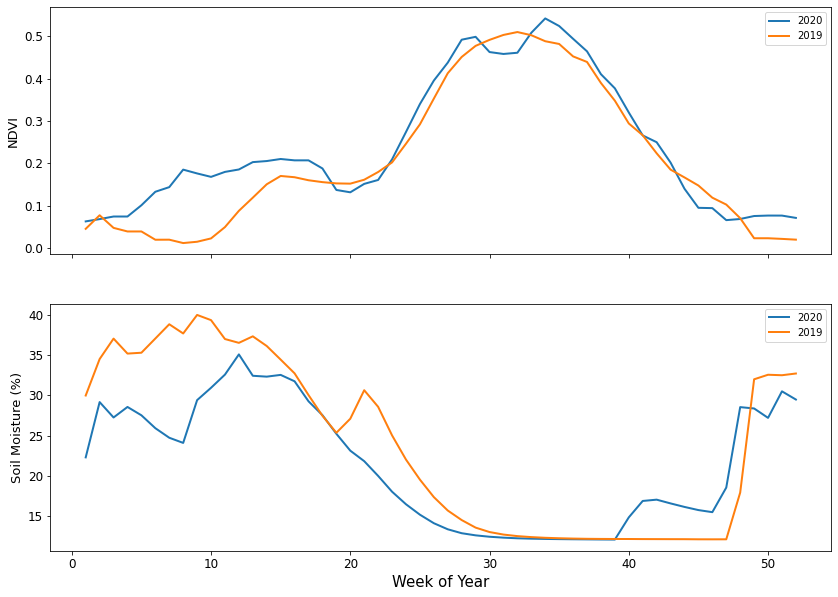

In [105]:
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

axs[0].plot(ndvi_pv, linewidth=2.0)
axs[1].plot(soil_pv,  linewidth=2.0)

for (ax, lab) in zip(axs, ylabs):
    ax.set_ylabel(lab, size=13)
    ax.legend(['2020','2019'])
    ax.tick_params('both', labelsize=12)

axs[-1].set_xlabel('Week of Year', size=15)
